Loading...
28


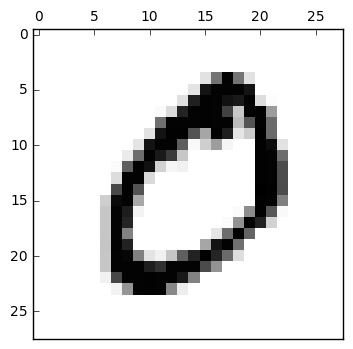

735.398269844


TypeError: Can't differentiate wrt numpy arrays of dtype object

In [ ]:
import numpy as np
import mnist as mn
from autograd.optimizers import adam
from autograd import grad

def init_params(layer_widths, scale):
    """Contstructs a list of tuples (W,b) weight, bias"""
    params = []
    for i in range(len(layer_widths) - 1):
        params.append(
            (
                np.random.rand(layer_widths[i+1], layer_widths[i]) * scale, # weights
                np.random.rand(layer_widths[i+1]) * scale # bias
            )
        )
    
    return params

def evaluate_net(sample, params):
    """Evalutes sample with network params"""
    inputs = sample
    for W,b in params:
        outputs = np.dot(W, inputs) + b
        inputs = np.maximum(outputs, 0.0) # ReLU

    return inputs # Do I need to do a different operation at the output layer for autoencoder? Need to enforce sparsity too

def auto_enc_loss(samples, params):
    error = 0.0
    for sample in train_data:
        prediction = evaluate_net(sample, params)
        error += np.mean((sample - prediction) ** 2) 

    return error / len(train_data)
    
def train(train_data, test_data, layer_widths, step_size, num_iters):
    def objective(params, iteration):
        return auto_enc_loss(train_data, params)

    def print_perf(params, iteration, gradient):
        print('Training error: ', auto_enc_loss(train_data, params))
        print('Test error: ', auto_enc_loss(test_data, params))
    
    objective_grad = grad(objective)
    params = init_params(layer_widths, 0.1)
    
    optimized_params = adam(
        grad=objective_grad,
        init_params=params,
        step_size=step_size,
        num_iters=num_iters,
        callback=print_perf
    )
    
    return optimized_params

trn_samp = list(mn.read(dataset='training', path='./mnist'))
test_samp = list(mn.read(dataset='testing', path='./mnist'))

print("Loading...")
print(len(trn_samp[0][1][0]))
mn.show(trn_samp[1][1])

in_size = 28 * 28
layer_widths = [in_size, 100, in_size]

param_scale = 0.1
num_iters = 1000
step_size = 0.001

train_data = [mn.to_vec(samp[1]) for samp in trn_samp]
test_data = [mn.to_vec(samp[1]) for samp in test_samp]

params = init_params(layer_widths, 0.1)
print(auto_enc_loss(train_data, params))
exit()
params = train(train_data, test_data, layer_widths, step_size, num_iters)

output = evaluate_net(mn.to_vec(trn_samp[1][1]), params)
mn.show(mn.from_vec(output))

